<a href="https://colab.research.google.com/github/obeabi/Stocks_TSA/blob/main/TimeSeries_VDYTO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# Install libraries
import pandas as pd
import numpy as np



import scipy 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu, fisher_exact, ttest_ind
from scipy.stats.mstats import ks_twosamp
import statsmodels
from statsmodels.graphics.mosaicplot import mosaic
%matplotlib inline

plt.rcParams['figure.figsize'] = (16.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


print("libraries installed succesfully!")

libraries installed succesfully!


In [24]:
#df = pd.read_csv('VDY.TO.csv',index_col='Date',parse_dates=True)
df = pd.read_csv('SCHD.csv',index_col='Date',parse_dates=True)

df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-10-20,25.000000,25.049999,24.719999,24.980000,17.964403,98900
2011-10-21,25.330000,25.469999,25.240000,25.469999,18.316786,188800
2011-10-24,25.990000,25.990000,25.480000,25.610001,18.417469,296600
2011-10-25,25.520000,25.520000,25.180000,25.190001,18.115431,94400
2011-10-26,25.559999,25.559999,25.110001,25.450001,18.302402,45000


In [25]:
# Focusing on close prIce only
df1 = df['Close'].to_frame()
df1.head()

,Close
Date,
2011-10-20,24.980000
2011-10-21,25.469999
2011-10-24,25.610001
2011-10-25,25.190001
2011-10-26,25.450001


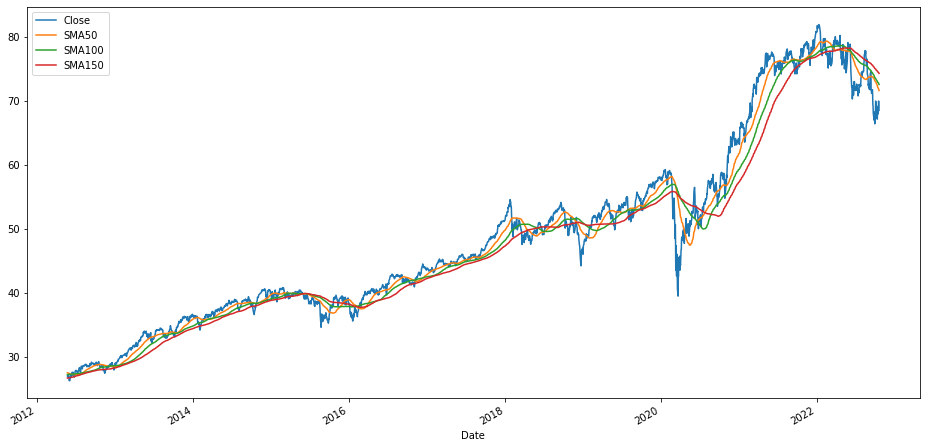

In [26]:
# Calculate the thirty day moving average of close price
df1['SMA50'] = df1['Close'].rolling(50).mean()

# Calculate the thirty day moving average of close price
df1['SMA100'] = df1['Close'].rolling(100).mean()


# Calculate the thirty day moving average of close price
df1['SMA150'] = df1['Close'].rolling(150).mean()

# calculating exponential moving average
# using .ewm(span).mean() , with window size = 30
df1['EWMA30'] = df1['Close'].ewm(span=30).mean()

# calculating cumulative moving
# average using .expanding().mean()
df1['CMA30'] = df1['Close'].expanding().mean()



# removing all the NULL values using dropna() method
df1.dropna(inplace=True)
 
# plotting Close price and simple
# moving average of 30 days using .plot() method
df1[['Close', 'SMA50', 'SMA100', 'SMA150']].plot(label='VDY.TO')
plt.show()